In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


### HOW TO SCALE NORMALIZE STANDARDIZE?
data pre-processing

    remove or fill missing values
    transfrom categorical / ordinal into numerical values
    deal with outliers (since they will skew the fit of the model)
    creating new features from existing ones Goal ist to achieve better ML results

scaling

regresssion with numbers in widely different scale ist an issue for variance: example 1 number in the dozens the other in the billions: creates problem as large scale number will be considerd "more important". We want all in comparable scale

option to deal with it

    (1) standardization: transform distribution to mean 0 and standard deviation of 1: For each data point subtract the mean and divide by standard deviation
    (2) normalization: from each data point substract minimum and divide by (max-min): Achievs that all values are between 0 and 1



In [141]:
#SET SIZE OF ALL PRINTS
plt.rcParams['figure.figsize'] = [25, 6]


In [142]:
credit_risk=pd.read_csv('credit_risk_dataset.csv')
credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [143]:
credit_risk["loan_status"].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

#### NULL VALUES

In [144]:
credit_risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [145]:
credit_risk=credit_risk.dropna(how='any',axis=0)
credit_risk.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# TARGET IS loan_status
* We want to predict if someone will default (1) or not (0)
* We are dealing with a binary classification problem


In [146]:
# credit_risk["loan_status"]=np.where(credit_risk.loc[:,["loan_status"]]==1,"DENY","APPROVE")

In [147]:
credit_risk["loan_status"] = np.where(credit_risk.loc[:,["loan_status"]]==1,"DENY","APPROVE")
credit_risk["loan_status"].value_counts()

<ipython-input-147-e4c21ee85ba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk["loan_status"] = np.where(credit_risk.loc[:,["loan_status"]]==1,"DENY","APPROVE")


APPROVE    22435
DENY        6203
Name: loan_status, dtype: int64

In [148]:
credit_risk['loan_status'].isnull().sum()

0

# INVESTIGATING

In [149]:
credit_risk.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                    object
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

### Investigating the numerical variables

In [150]:
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [151]:
# TO BE NOTES
# AGE 144 LOOKS SUSPICOUS

### Multicollinearity

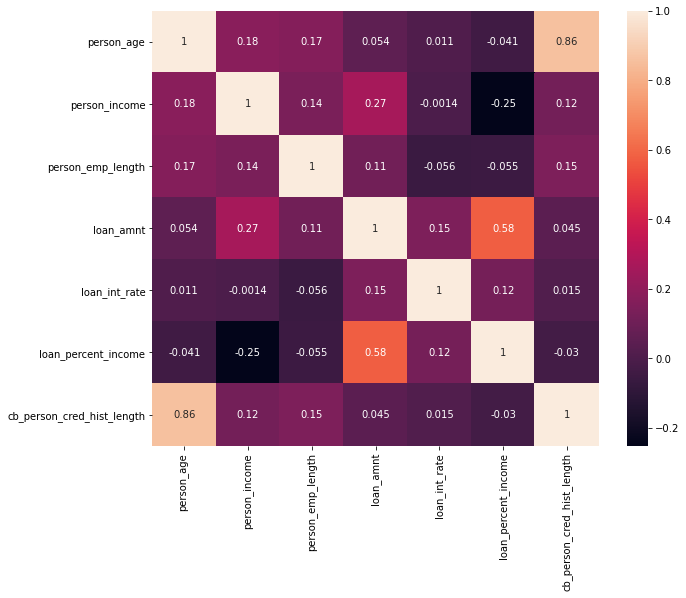

In [152]:
# Checking for multicollinearity
plt.figure(figsize=(10, 8))
ax = sns.heatmap(credit_risk.corr(), annot=True)
plt.show()

In [153]:
# Correlation with cb_person_cred_hist_length and age is annoyingly high.
# I'll get rid of cb_person_cred_hist_length to avoid multi colinarity 
credit_risk.drop(columns="cb_person_cred_hist_length",inplace=True)

C:\Users\april\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### DISTRIBUTION
taking care of distribution of numerical variables and feeding ne distributions into analysis datafram "df_norm"

In [154]:
df_norm=credit_risk
df_norm.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,DENY,0.59,Y
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,APPROVE,0.10,N
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,DENY,0.57,N
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,DENY,0.53,N
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,DENY,0.55,Y


#### person_age

DescribeResult(nobs=28638, minmax=(20, 144), mean=27.727215587680703, variance=39.821664565805136, skewness=2.5647289679115506, kurtosis=18.71526930783637)


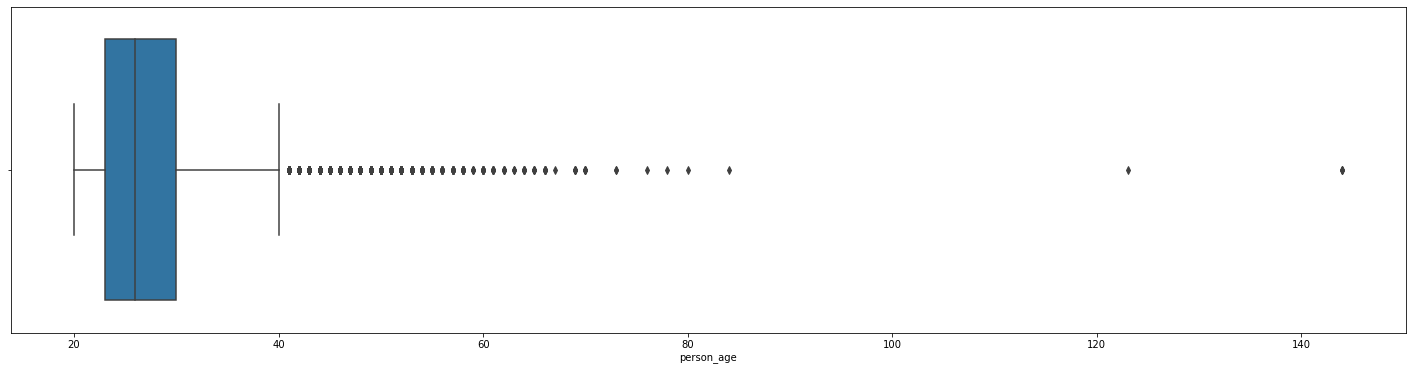

In [155]:
# AGE
#age 144 looked suspicous, but there is more
print(stats.describe(df_norm.person_age))
sns.boxplot(x=df_norm.person_age)

DescribeResult(nobs=28638, minmax=(0.41378387686969476, 0.4140799643130171), mean=0.41392553032725304, variance=3.583617084780445e-09, skewness=0.15487746701618882, kurtosis=-0.8817414276372864)


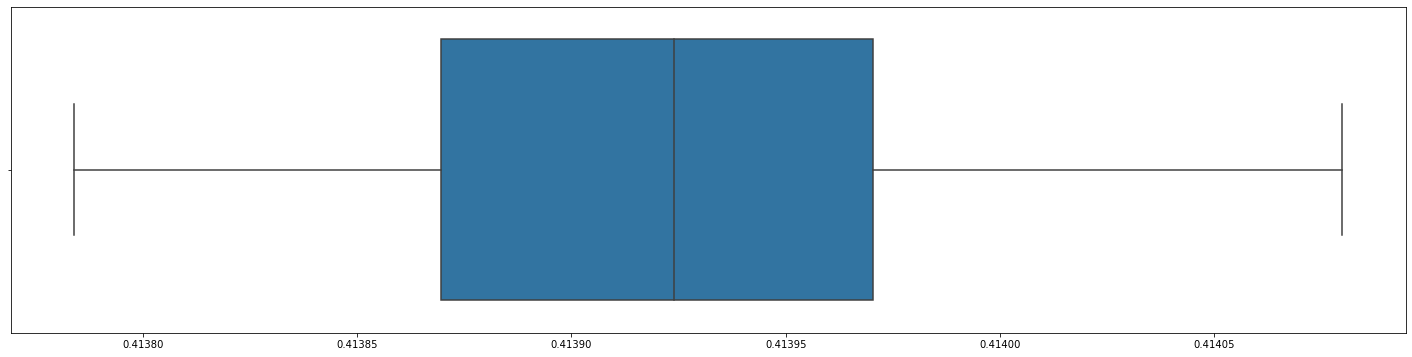

In [156]:
#boxcox array
age_array, lmbda = stats.boxcox(df_norm.person_age)
sns.boxplot(x=age_array)
print(stats.describe(age_array))



In [157]:
# feeding boxcox array to dataframe
df_norm.loc[:,["person_age"]]=age_array

C:\Users\april\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### person_income

DescribeResult(nobs=28638, minmax=(4000, 6000000), mean=66649.37188351141, variance=3888326532.9361815, skewness=35.188780249995624, kurtosis=2955.548413444316)


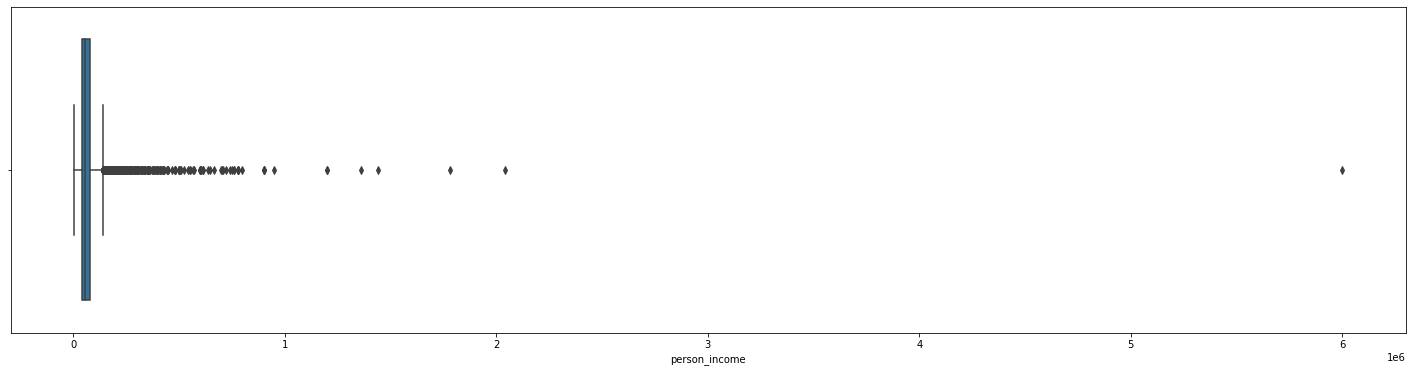

In [158]:
print(stats.describe(df_norm.person_income))
sns.boxplot(x=df_norm.person_income)

DescribeResult(nobs=28638, minmax=(6.012530313700186, 8.791380310871112), mean=7.20867942826867, variance=0.05136271652532924, skewness=-0.01555582268167787, kurtosis=0.9879525089019747)


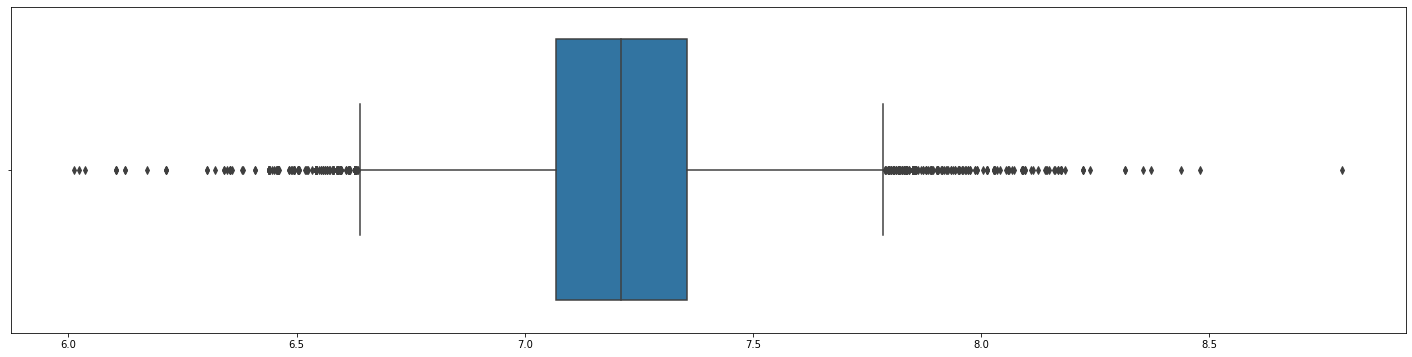

In [159]:
#boxcox array
income_array, lmbda = stats.boxcox(df_norm.person_income)
print(stats.describe(income_array))

sns.boxplot(x=income_array)
plt.show()

In [160]:
# feeding boxcox array to dataframe
df_norm.loc[:,['person_income']]=income_array

C:\Users\april\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [161]:
#OUTLIERS
iqr = np.percentile(df_norm['person_income'],75) - np.percentile(df_norm['person_income'],25)
upper_limit = np.percentile(df_norm['person_income'],75) + 1.5*iqr 
lower_limit = np.percentile(df_norm['person_income'],25) - 1.5*iqr

df_norm.loc[:,['person_income']] = df_norm['person_income'][(df_norm['person_income']>lower_limit) & (df_norm['person_income']<upper_limit)]

In [162]:
#nan values were created.lets drop them
df_norm["person_income"].isnull().sum()

512

In [163]:
df_norm=df_norm.dropna(how='any',axis=0)

In [109]:
df_norm.shape

(28126, 11)

DescribeResult(nobs=28126, minmax=(6.63969226109463, 7.784927031505826), mean=7.210428016809628, variance=0.043118098323103336, skewness=-0.015559362208562738, kurtosis=-0.21557560515766205)


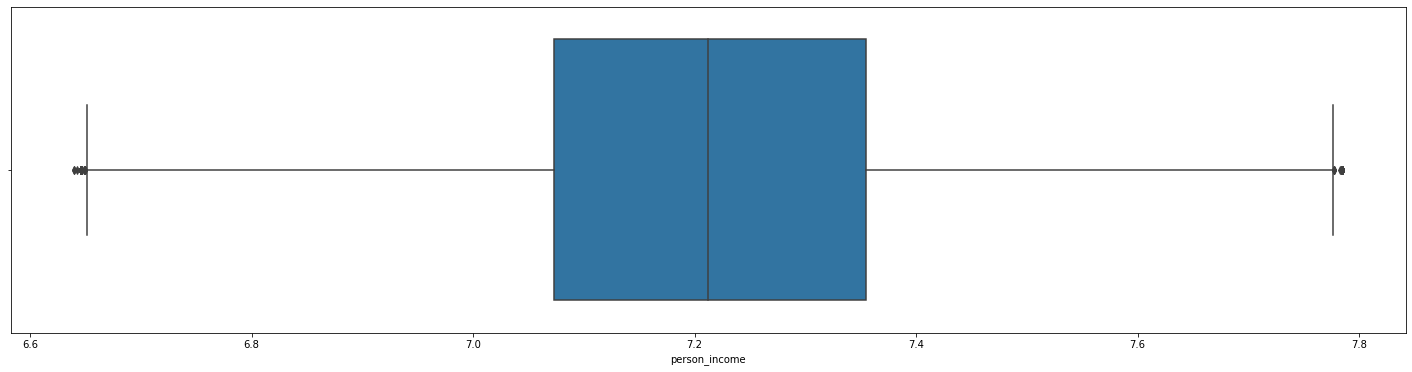

In [84]:

print(stats.describe(df_norm['person_income']))

sns.boxplot(x=df_norm['person_income'])
plt.show()

#### loan_amnt

DescribeResult(nobs=28126, minmax=(500, 35000), mean=9662.332894830406, variance=39174887.38318598, skewness=1.1621815397547683, kurtosis=1.3265639718039246)


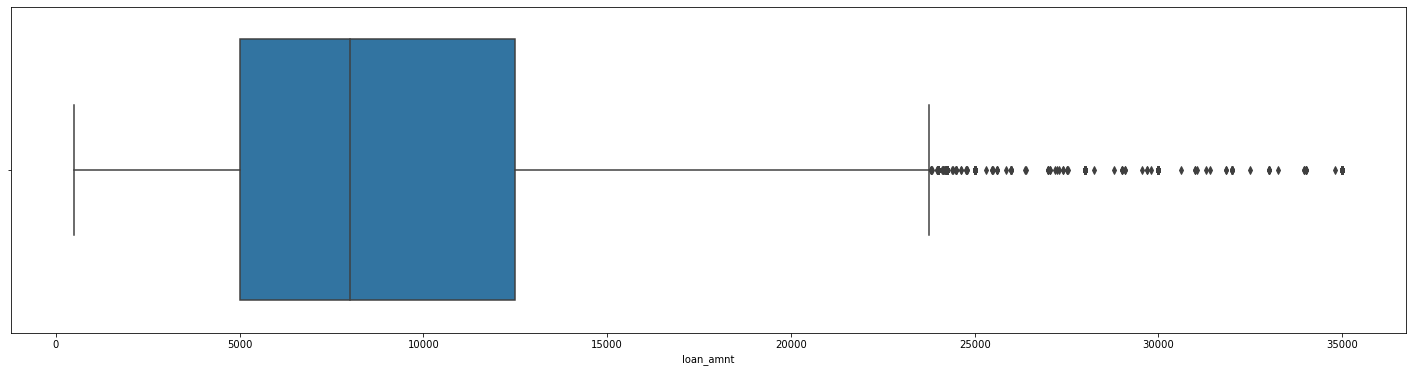

In [164]:
sns.boxplot(df_norm.loan_amnt)
print(stats.describe(df_norm.loan_amnt))

plt.show()

DescribeResult(nobs=28126, minmax=(14.490938203152691, 48.04042495783807), mean=32.58286633853099, variance=36.34454314504282, skewness=-0.020953493367834433, kurtosis=-0.3627510050948164)


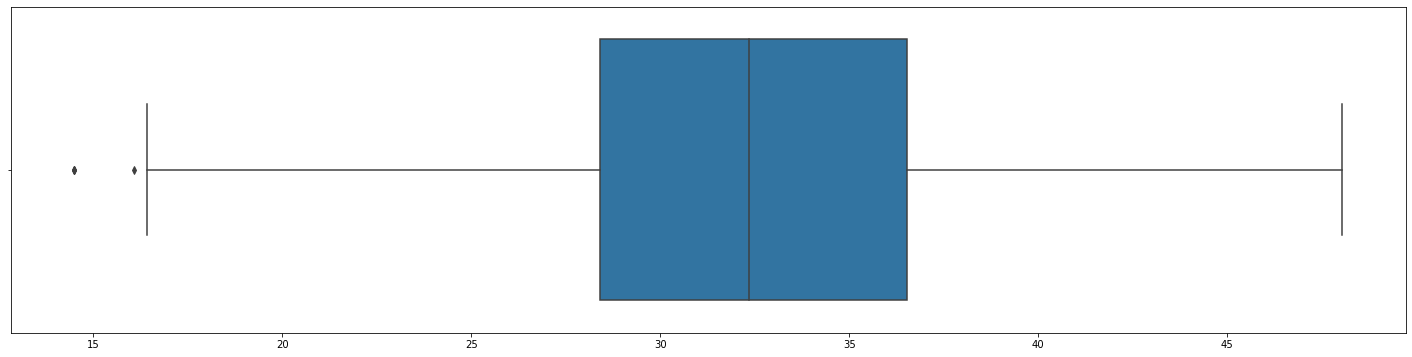

In [165]:
# boxcox loan_amnt
loan_amnt_array, lmbda = stats.boxcox(df_norm.loan_amnt)
print(stats.describe(loan_amnt_array))
sns.boxplot(loan_amnt_array)
plt.show()

In [166]:
# feeding boxcox array to dataframe

df_norm['loan_amnt']=loan_amnt_array

<ipython-input-166-f6fb1001135a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['loan_amnt']=loan_amnt_array


#### loan_int_rate

DescribeResult(nobs=28126, minmax=(5.42, 23.22), mean=11.027606485102753, variance=10.420094836216075, skewness=0.2048498571810015, kurtosis=-0.6629540013322761)


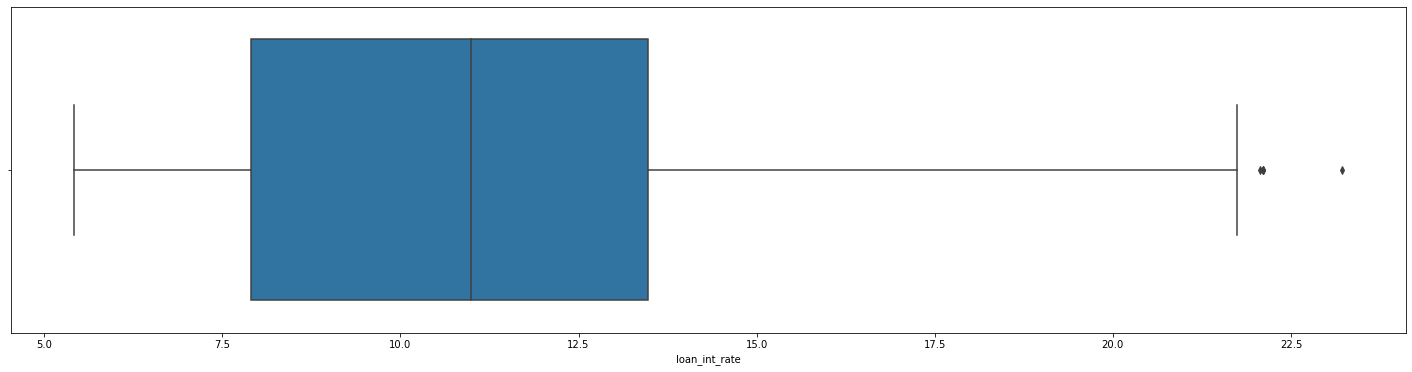

In [167]:
print(stats.describe(df_norm.loan_int_rate))
sns.boxplot(df_norm.loan_int_rate)
plt.show()

DescribeResult(nobs=28126, minmax=(2.730828013005394, 8.08366440293936), mean=4.763551588255308, variance=1.108973980603216, skewness=-0.047425469069087685, kurtosis=-0.8320583308111886)


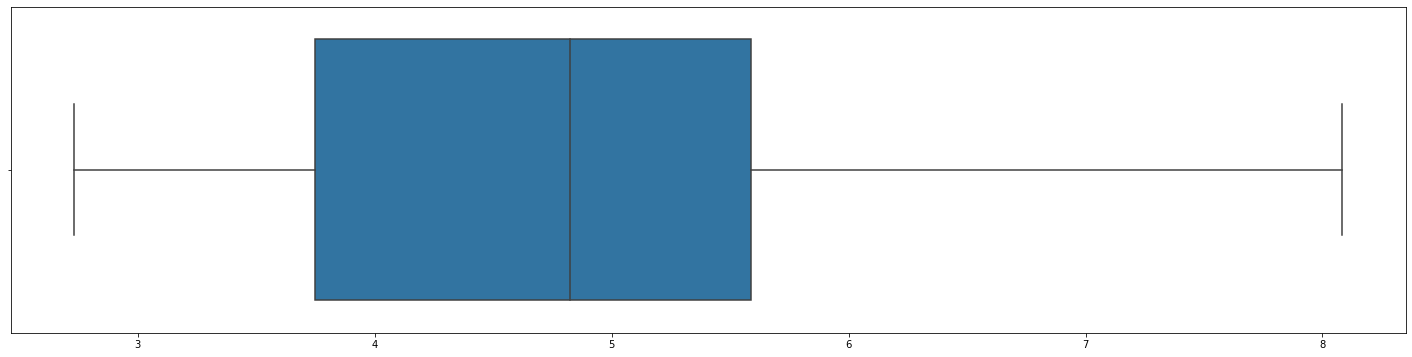

In [168]:
#BOXCOX WITH AWFULL RESULT
loan_int_rate_array, lmbda = stats.boxcox(df_norm.loan_int_rate)
print(stats.describe(loan_int_rate_array))
sns.boxplot(loan_int_rate_array)
plt.show()

In [169]:
df_norm.loan_int_rate=loan_int_rate_array

C:\Users\april\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### loan_percent_income

DescribeResult(nobs=28126, minmax=(0.01, 0.83), mean=0.16920856147336982, variance=0.01104816293612079, skewness=1.0549705953493662, kurtosis=1.1859946713884897)


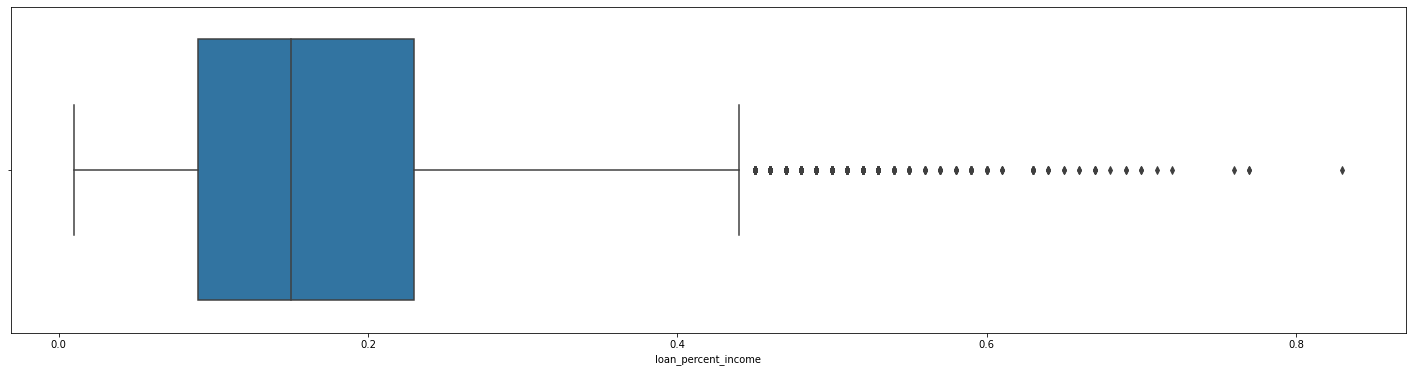

In [170]:
print(stats.describe(df_norm.loan_percent_income))
sns.boxplot(df_norm.loan_percent_income)
plt.show()

DescribeResult(nobs=28126, minmax=(-2.5030844447620857, -0.1812438148068888), mean=-1.4602938360552604, variance=0.1373822180154389, skewness=-0.02553593167712781, kurtosis=-0.3641440900388728)


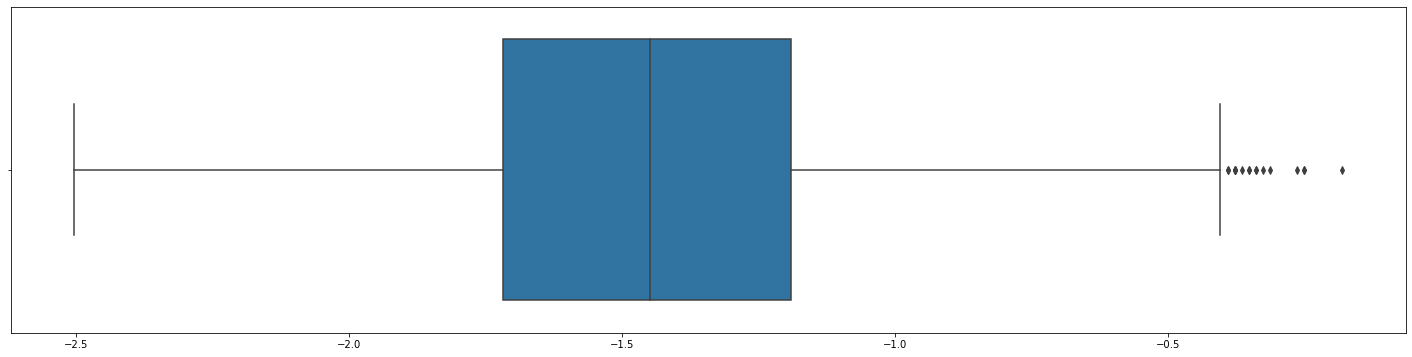

In [171]:
loan_percent_income_array, lmbda = stats.boxcox(df_norm.loan_percent_income)
print(stats.describe(loan_percent_income_array))
sns.boxplot(loan_percent_income_array)
plt.show()

In [172]:
# feeding boxcox array to dataframe
df_norm.loan_percent_income=loan_percent_income_array

C:\Users\april\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [173]:
iqr = np.percentile(df_norm.loan_percent_income,75) - np.percentile(df_norm.loan_percent_income,25)
upper_limit = np.percentile(df_norm.loan_percent_income,75) + 1.5*iqr 
lower_limit = np.percentile(df_norm.loan_percent_income,25) - 1.5*iqr
df_norm.loan_percent_income = df_norm.loan_percent_income[(df_norm.loan_percent_income>lower_limit) & (df_norm.loan_percent_income<upper_limit)]


DescribeResult(nobs=28126, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)


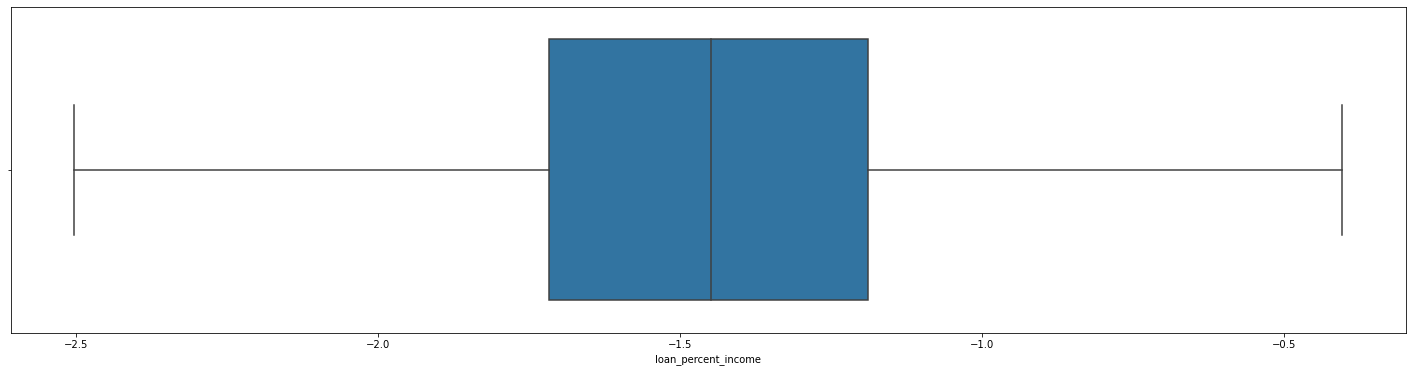

In [174]:
print(stats.describe(df_norm.loan_percent_income))
sns.boxplot(df_norm.loan_percent_income)
plt.show()

In [175]:
#resulted in null values again
df_norm.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income          17
cb_person_default_on_file     0
dtype: int64

In [176]:
df_norm=df_norm.dropna(how='any',axis=0)

#### person_emp_length
employment lenght

DescribeResult(nobs=28109, minmax=(0.0, 123.0), mean=4.799352520545021, variance=17.198105458085738, skewness=2.787637650176403, kurtosis=48.82360230190498)


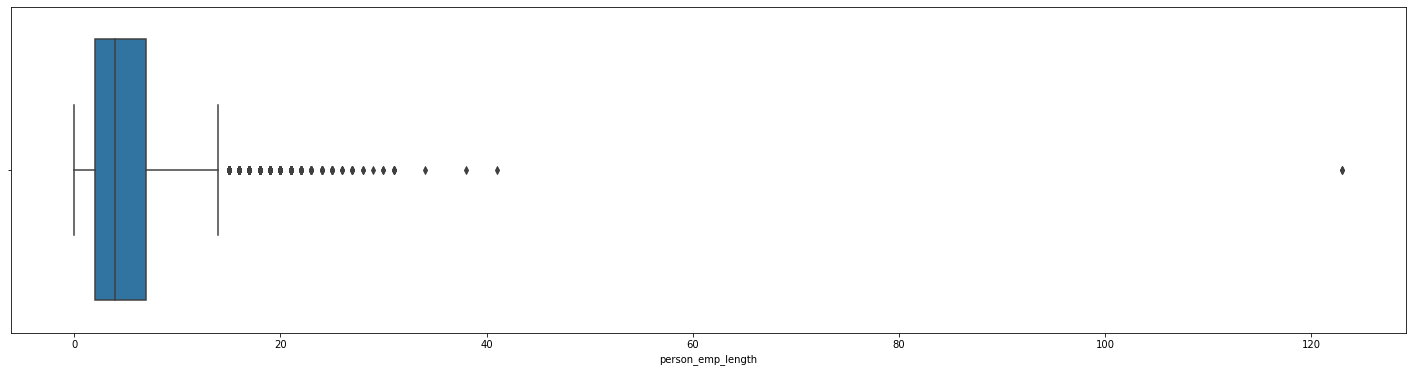

In [177]:
print(stats.describe(df_norm.person_emp_length))
sns.boxplot(df_norm.person_emp_length)
plt.show()

In [ ]:
"""#boxcox
df_norm.person_emp_length_array, lmbda = stats.boxcox(df_norm.person_emp_length)
print(stats.describe(df_norm.person_emp_length_array))
sns.boxplot(df_norm.person_emp_length_array)
plt.show()"""

In [178]:
#percentile outliers

iqr = np.percentile(df_norm.person_emp_length,75) - np.percentile(df_norm.person_emp_length,25)
upper_limit = np.percentile(df_norm.person_emp_length,75) + 1.5*iqr 
lower_limit = np.percentile(df_norm.person_emp_length,25) - 1.5*iqr
df_norm.person_emp_length = df_norm.person_emp_length[(df_norm.person_emp_length>lower_limit) & (df_norm.person_emp_length<upper_limit)]


DescribeResult(nobs=28109, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)


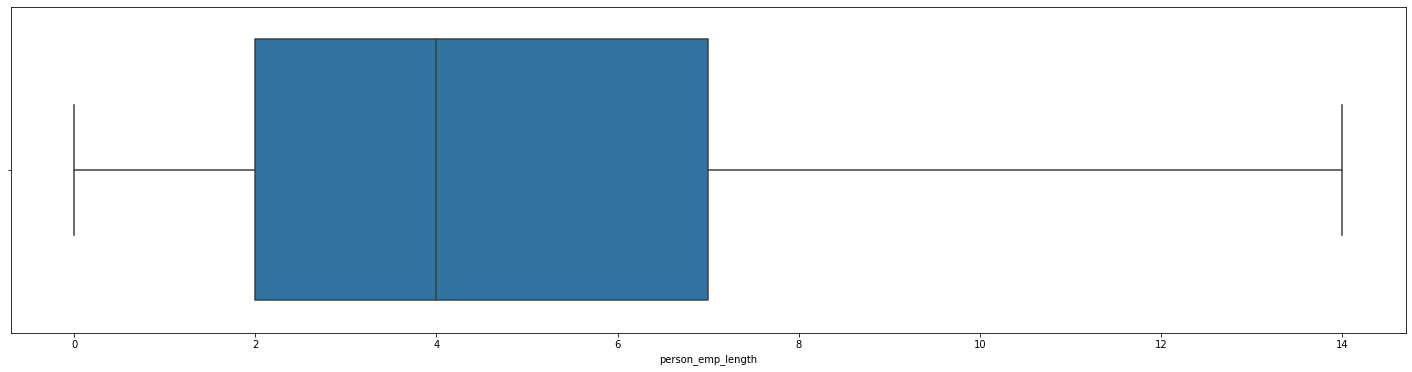

In [179]:
print(stats.describe(df_norm.person_emp_length))
sns.boxplot(df_norm.person_emp_length)

In [180]:
df_norm.isnull().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length            755
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_default_on_file      0
dtype: int64

In [181]:
df_norm=df_norm.dropna(how='any',axis=0)

In [182]:
df_norm

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file
3,0.413869,7.275371,RENT,4.0,MEDICAL,C,48.040425,6.089989,DENY,-0.578360,N
4,0.413890,7.200196,RENT,8.0,MEDICAL,C,48.040425,5.819926,DENY,-0.547542,Y
6,0.413924,7.340443,RENT,8.0,EDUCATION,B,48.040425,5.274115,DENY,-0.710495,N
7,0.413890,7.349864,RENT,5.0,MEDICAL,B,48.040425,4.864053,DENY,-0.728144,N
8,0.413890,7.369586,RENT,8.0,PERSONAL,A,48.040425,4.116576,DENY,-0.764304,N
...,...,...,...,...,...,...,...,...,...,...,...
32576,0.414059,7.189549,MORTGAGE,1.0,PERSONAL,C,29.607430,5.496752,APPROVE,-1.616753,N
32577,0.414055,7.512662,MORTGAGE,4.0,PERSONAL,A,40.044314,3.592939,APPROVE,-1.448578,N
32578,0.414065,7.334744,RENT,3.0,HOMEIMPROVEMENT,B,48.040425,4.825377,DENY,-0.693120,N
32579,0.414058,7.597182,MORTGAGE,5.0,PERSONAL,B,38.350036,4.982080,APPROVE,-1.665383,N


In [183]:
df_norm.loan_amnt.describe()

count    27354.000000
mean        32.552362
std          6.021182
min         14.490938
25%         28.414757
50%         32.343734
75%         36.373989
max         48.040425
Name: loan_amnt, dtype: float64

## STANDARDIZE

In [184]:
df_norm.isnull().sum()

person_age                   0
person_income                0
person_home_ownership        0
person_emp_length            0
loan_intent                  0
loan_grade                   0
loan_amnt                    0
loan_int_rate                0
loan_status                  0
loan_percent_income          0
cb_person_default_on_file    0
dtype: int64

In [186]:
from sklearn.preprocessing import StandardScaler
# selecting only the numerical columns
df_norm_num = df_norm.select_dtypes(include = np.number)
display('Before standardization:\n ',df_norm_num .head())
# standardize data
scaler = StandardScaler(with_mean=True).fit(df_norm_num)
df_norm_num_standardized = scaler.transform(df_norm_num)
df_norm_num_standardized  = pd.DataFrame(df_norm_num_standardized, columns = df_norm_num.columns)
display('\nAfter Standardized: \n',df_norm_num_standardized .head())

'Before standardization:\n '

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
3,0.413869,7.275371,4.0,48.040425,6.089989,-0.578360
4,0.413890,7.200196,8.0,48.040425,5.819926,-0.547542
6,0.413924,7.340443,8.0,48.040425,5.274115,-0.710495
7,0.413890,7.349864,5.0,48.040425,4.864053,-0.728144
8,0.413890,7.369586,8.0,48.040425,4.116576,-0.764304


'\nAfter Standardized: \n'

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
0,-0.913981,0.324312,-0.128153,2.57231,1.257265,2.387331
1,-0.559945,-0.038646,1.036661,2.57231,1.000476,2.470844
2,0.014916,0.638491,1.036661,2.57231,0.481490,2.029261
3,-0.559945,0.683975,0.163050,2.57231,0.091582,1.981436
4,-0.559945,0.779194,1.036661,2.57231,-0.619158,1.883447


## CREATE DUMMIES OF CATEGORICALS

In [187]:
from sklearn.preprocessing import OneHotEncoder
df_norm_cat = df_norm.select_dtypes(include = np.object).drop(columns = 'loan_status')

enc = OneHotEncoder(drop = "first")

df_norm_cat = pd.DataFrame(enc.fit_transform(df_norm_cat).toarray(),columns = enc.get_feature_names())

In [188]:
df_norm_cat=df_norm_cat.rename(columns={'x0_OTHER':'ownership_other','x0_OWN':'ownership_own','x0_RENT':'ownership_rent','x1_EDUCATION':'intent_education','x1_HOMEIMPROVEMENT':'intent_homeimprovement','x1_MEDICAL':'intent_medical','x1_PERSONAL':'intent_personal','x1_VENTURE':'intentn_venture','x2_B':'grade_B','x2_C':'grade_C','x2_D':'grade_D','x2_E':'grade_E','x2_F':'grade_F','x2_G':'grade_G','x3_Y':'prev_default'})

In [189]:
df_norm_cat

,ownership_other,ownership_own,ownership_rent,intent_education,intent_homeimprovement,intent_medical,intent_personal,intentn_venture,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,prev_default
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27349,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27350,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27351,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27352,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


dropped in dummy creation
ownership: MORTGAGE
use of loan: DEBTCONSOLIDATION
grade: A
default in history: No was dropped

## CONCATINATE

In [190]:
df=pd.concat([df_norm_num_standardized,df_norm_cat],axis=1)

## TEST AND TRAIN

In [191]:
X=df
y=df_norm.loan_status

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=102)

# DECISION TREE

#### Score, Precision, Recall and the F1 Score

In [299]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_tree=decisiontree.predict(X_test)
print('Score: ',decisiontree.score(X_test, y_test))
accuracy_tree = decisiontree.score(X_test, y_test)


Score:  0.8863868986693961


In [257]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(r'Precision', precision_score(y_test, y_pred_tree, pos_label='DENY'))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_test, y_pred_tree, pos_label='DENY'))
print(r'F1 Score: ',f1_score(y_test, y_pred_tree, pos_label='DENY'))

Precision 0.7271487039563438
Recall:  0.7480701754385964
F1 Score:  0.737461086129367


In [258]:
precision_tree = precision_score(y_test, y_pred_tree, pos_label='DENY')
recall_tree = recall_score(y_test, y_pred_tree, pos_label='DENY')
f1_tree = f1_score(y_test, y_pred_tree, pos_label='DENY')

In [259]:
#Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy; ',balanced_accuracy_score(y_test,y_pred_tree))
bal_accuracy_tree = balanced_accuracy_score(y_test,y_pred_tree)

Balanced Accuracy;  0.8370938243280903


[[5014  400]
 [ 359 1066]]


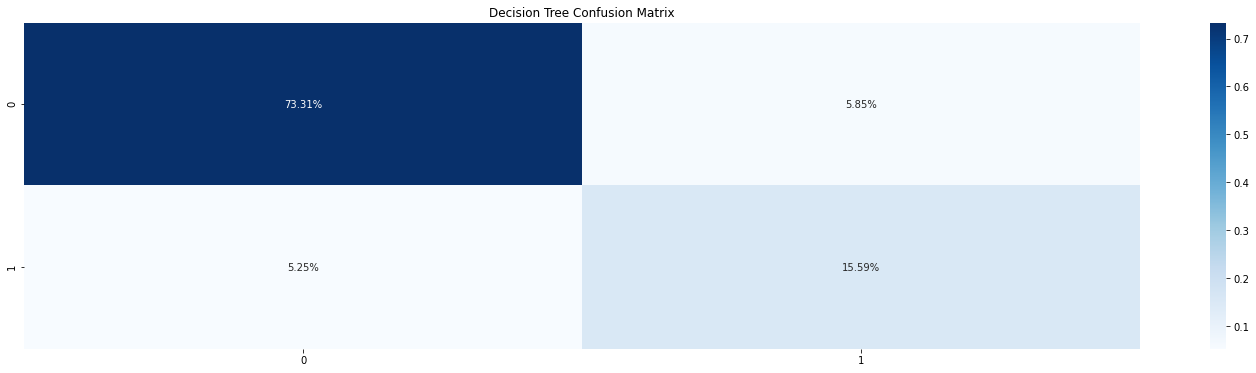

In [276]:
from sklearn.metrics import confusion_matrix
cf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(cf_matrix_tree)
# sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
           # fmt='.2%', cmap='Blues')

fig_tree_cf = sns.heatmap(cf_matrix_tree/np.sum(cf_matrix_tree), annot=True, 
            fmt='.2%', cmap='Blues').get_figure()
plt.title("Decision Tree Confusion Matrix")
fig_tree_cf.savefig(fname="../Graphs for ppt/tree_cf")

In [ ]:
# 73.3% we approve them for credit, and they are able to pay it back true/negative
# 15.5% we deny them credit. and thats smart. because they are having issues true/positiv
# 5.19 we approve credit BUT they cannot pay back! This is RISK. we want this  at Zero false/negative
# 5.86 we deny credit BUT they actually could pay it back! Those are "just" good clients we refused false/positive

## Nearest neighbour

In [267]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier().fit(X_train, y_train)
y_pred_nn = nearest_neighbors.predict(X_test)
print(nearest_neighbors.score(X_test, y_test))
# 0.8910659453136424

accuracy_nn = nearest_neighbors.score(X_test, y_test)

0.8910659453136424


In [273]:
print(r'Precision', precision_score(y_test, y_pred_nn, pos_label='DENY'))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_test, y_pred_nn, pos_label='DENY'))
print(r'F1 Score: ',f1_score(y_test, y_pred_nn, pos_label='DENY'))

Precision 0.8041144901610018
Recall:  0.6308771929824561
F1 Score:  0.7070389303971687


In [274]:
precision_nn = precision_score(y_test, y_pred_nn, pos_label='DENY')
recall_nn = recall_score(y_test, y_pred_nn, pos_label='DENY')
f1_nn = f1_score(y_test, y_pred_nn, pos_label='DENY')

In [275]:
#Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy; ',balanced_accuracy_score(y_test,y_pred_nn))
bal_accuracy_nn = balanced_accuracy_score(y_test,y_pred_nn)

Balanced Accuracy;  0.7952132547845416


[[5195  219]
 [ 526  899]]


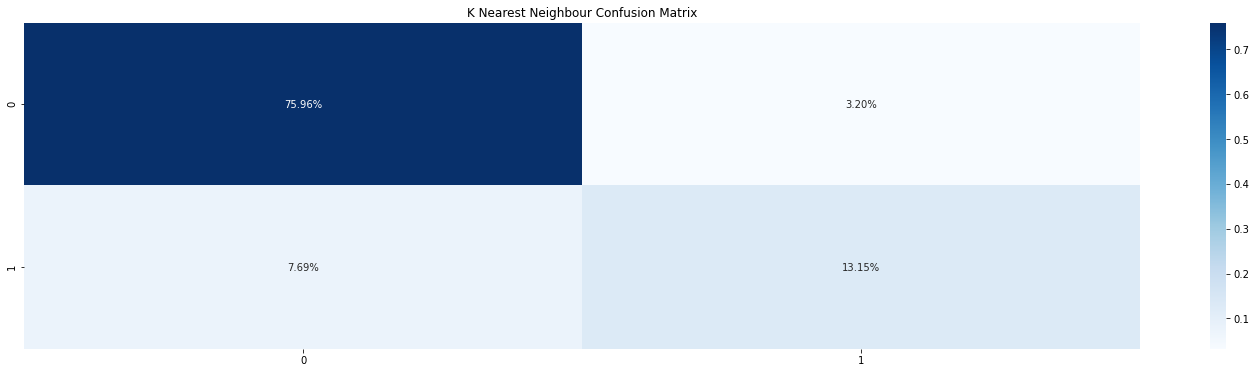

In [281]:
from sklearn.metrics import confusion_matrix
cf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print(cf_matrix_nn)
# sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#             fmt='.2%', cmap='Blues')

fig_nn_cf = sns.heatmap(cf_matrix_nn/np.sum(cf_matrix_nn), annot=True, 
            fmt='.2%', cmap='Blues').get_figure()
plt.title("K Nearest Neighbour Confusion Matrix")
fig_nn_cf.savefig(fname="../Graphs for ppt/nn_cf")

In [ ]:
# BAD! false negative is larger tan with decisiontree. 
# We offer credit to 7,69% that actually adre defaulting

## SVM SUPPORT VECTOR MACHINE


In [283]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(svm.score(X_test, y_test))
accuracy_svm = svm.score(X_test, y_test)

0.9137300774967101


In [284]:
print(r'Precision', precision_score(y_test, y_pred_svm, pos_label='DENY'))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_test, y_pred_svm, pos_label='DENY'))
print(r'F1 Score: ',f1_score(y_test, y_pred_svm, pos_label='DENY'))

Precision 0.912142152023692
Recall:  0.6484210526315789
F1 Score:  0.7579983593109105


In [285]:
precision_svm = precision_score(y_test, y_pred_svm, pos_label='DENY')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='DENY')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='DENY')

In [286]:
#Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy; ',balanced_accuracy_score(y_test,y_pred_svm))
bal_accuracy_svm = balanced_accuracy_score(y_test,y_pred_svm)

Balanced Accuracy;  0.8159910952112457


[[5325   89]
 [ 501  924]]


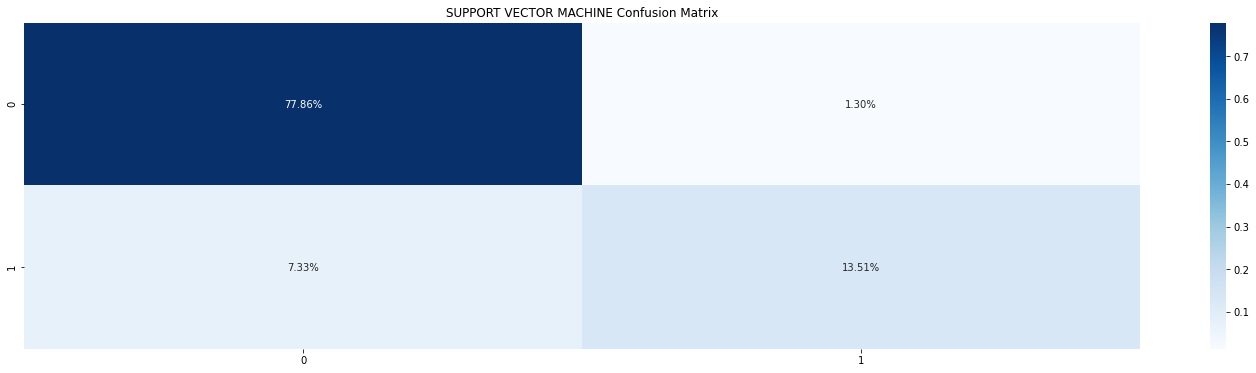

In [287]:
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(cf_matrix_svm)
# sns.heatmap(cf_matrix_svm/np.sum(cf_matrix_svm), annot=True, 
#             fmt='.2%', cmap='Blues')


fig_svm_cf = sns.heatmap(cf_matrix_svm/np.sum(cf_matrix_svm), annot=True, 
            fmt='.2%', cmap='Blues').get_figure()
plt.title("SUPPORT VECTOR MACHINE Confusion Matrix")
fig_svm_cf.savefig(fname="../Graphs for ppt/svm_cf")

In [ ]:
#thats worse. We hand out 7.33% a loan that they will actually default on

## Logisitc Regression

In [288]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter = 500).fit(X_train, y_train)
y_pred_log = logistic.predict(X_test)
logistic.score(X_test, y_test)
accuracy_log = logistic.score(X_test, y_test)

In [231]:
print(r'Precision', precision_score(y_test, y_pred_log, pos_label='DENY'))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_test, y_pred_log, pos_label='DENY'))
print(r'F1 Score: ',f1_score(y_test, y_pred_log, pos_label='DENY'))

Precision 0.7415384615384616
Recall:  0.5073684210526316
F1 Score:  0.6025


In [289]:
precision_log = precision_score(y_test, y_pred_log, pos_label='DENY')
recall_log = recall_score(y_test, y_pred_log, pos_label='DENY')
f1_log = f1_score(y_test, y_pred_log, pos_label='DENY')

In [290]:
#Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy; ',balanced_accuracy_score(y_test,y_pred_log))
bal_accuracy_log = balanced_accuracy_score(y_test,y_pred_log)

Balanced Accuracy;  0.7304112145898547


[[5162  252]
 [ 702  723]]


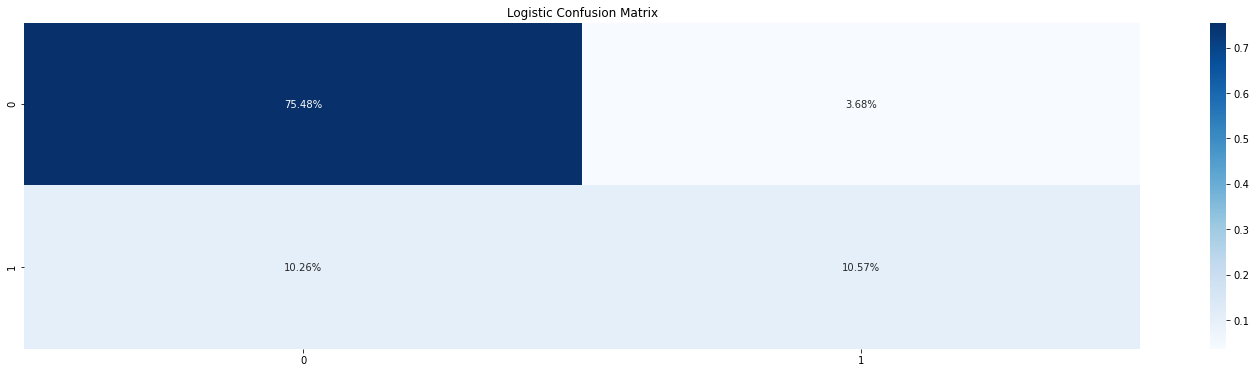

In [291]:
cf_matrix_log = confusion_matrix(y_test, y_pred_log)
print(cf_matrix_log)
# sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#             fmt='.2%', cmap='Blues')
fig_log_cf = sns.heatmap(cf_matrix_log/np.sum(cf_matrix_log), annot=True, 
            fmt='.2%', cmap='Blues').get_figure()
plt.title("Logistic Confusion Matrix")
fig_log_cf.savefig(fname="../Graphs for ppt/log_cf")

In [ ]:
#WORST_ we assign loads of people a loan that actually will default

## RANDOM FOREST

In [292]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = forest.predict(X_test)
forest.score(X_test, y_test)
accuracy_rf = forest.score(X_test, y_test)

In [293]:
precision_rf = precision_score(y_test, y_pred_rf, pos_label='DENY')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='DENY')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='DENY')

In [294]:
print(r'Precision', precision_score(y_test, y_pred_rf, pos_label='DENY'))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_test, y_pred_rf, pos_label='DENY'))
print(r'F1 Score: ',f1_score(y_test, y_pred_rf, pos_label='DENY'))

Precision 0.943449575871819
Recall:  0.7024561403508772
F1 Score:  0.8053097345132743


In [295]:
#Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy; ',balanced_accuracy_score(y_test,y_pred_rf))
bal_accuracy_rf = balanced_accuracy_score(y_test,y_pred_rf)

Balanced Accuracy;  0.8456868806667575


[[5354   60]
 [ 424 1001]]


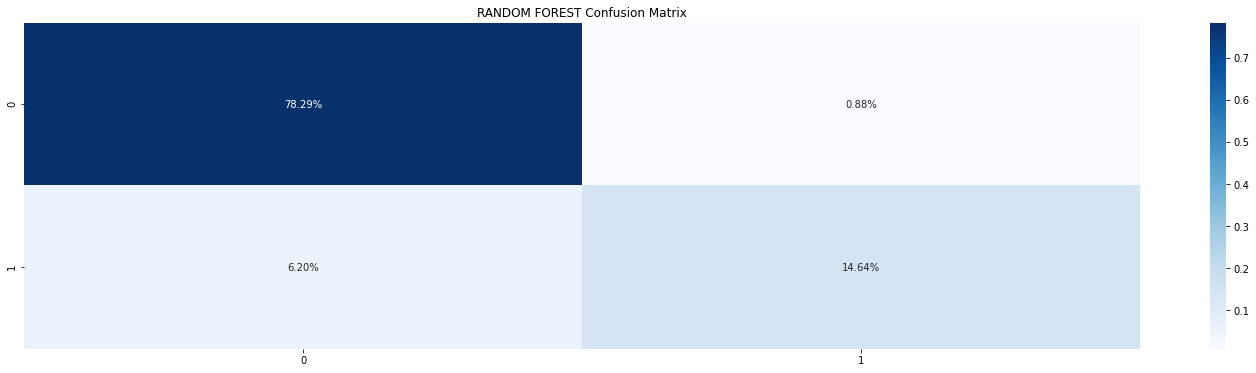

In [296]:
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(cf_matrix_rf)
# sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
#             fmt='.2%', cmap='Blues')

fig_rf_cf = sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, 
            fmt='.2%', cmap='Blues').get_figure()
plt.title("RANDOM FOREST Confusion Matrix")
fig_rf_cf.savefig(fname="../Graphs for ppt/rf_cf")

In [308]:
pd.set_option('display.max_columns', None)
results=pd.DataFrame({"Models":["Decision Tree", "K Nearest Neighbour", "Support Vector Machine", "Logistic Regression", "Random Forest" ], 
                      "Accuracy":[accuracy_tree, accuracy_nn, accuracy_svm, accuracy_log, accuracy_rf], 
                      "Precision":[precision_tree, precision_nn, precision_svm, precision_log, precision_rf], 
                      "Recall":[recall_tree, recall_nn, recall_svm, recall_log, recall_rf], 
                      "f1 Score":[f1_tree, f1_nn, f1_svm, f1_log, f1_rf], 
                      "Balanced Accuracy":[bal_accuracy_tree, bal_accuracy_nn, bal_accuracy_svm, bal_accuracy_log, bal_accuracy_rf]})
results_reset = results.set_index(["Models"])
results_reset
results_reset.to_excel("../results_comparison.xlsx")

# INTERPRETATION

DECISION TREE TURNED OUT TO BE BEST
PARTICULARLY  FALSE POSITIVE IS IMPORTANT TO US

# Hyperparameter Tuning for Decision Tree
#### DID NOT IMPROVE ANYTHING!


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
y_hype_train=np.where(y_train=='DENY',1,0)
y_hype_train

y_hype_test=np.where(y_test=='DENY',1,0)


y_hype_test

In [ ]:
param_grid = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": [3, 10, None],
                 "max_features":["auto", "sqrt", "log2",
                                ]
             }# max death helps avoiding overfitting by give a maximum depth

tune = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=param_grid,
                       cv=5,scoring='recall')

tune.fit(X_train, y_hype_train)
tune.best_params_ 

In [ ]:
decisiontree_opt = DecisionTreeClassifier(**tune.best_params_).fit(X_train, y_hype_train)
y_pred_tree_opt = decisiontree_opt.predict(X_test)
decisiontree_opt.score(X_test, y_hype_test)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(r'Precision', precision_score(y_hype_test, y_pred_tree_opt, pos_label=1))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_hype_test, y_pred_tree_opt, pos_label=1))
print(r'F1 Score: ',f1_score(y_hype_test, y_pred_tree_opt, pos_label=1))

In [ ]:
cf_matrix = confusion_matrix(y_hype_test, y_pred_tree_opt)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### Cross Validation
Answers if our split into training and test set biased?
or if a different split creates a better result
splits 

In [ ]:
from sklearn.model_selection import cross_validate

cross_validate(DecisionTreeClassifier(),
               X_train,
               y_hype_train,
               cv=100,
               scoring="recall")["test_score"].mean()

# INSERT / INTERFACE


In [239]:
pd.set_option('display.max_columns', None)
customer=pd.DataFrame(columns=X.columns)
customer.shape

(0, 21)

In [ ]:
credit_risk.person_age.mean()

In [241]:
customer.loc[len(df)] = [credit_risk.person_age.mean(),
                         credit_risk.person_income.mean(),
                         credit_risk.person_emp_length.mean(),
                         credit_risk.loan_amnt.mean(),
                         credit_risk.loan_int_rate.mean(),
                         credit_risk.loan_percent_income.mean(),
                         0,#ownership_other,
                         1,#ownership_own
                         0,#ownership_rent
                         0,#intent_education
                         0,#intent_homeimprovement
                         0,#intent_medical
                         0,#'intent_personal'
                         1, #intentn_venture
                         0, #gradeB
                         0, #grade C
                         0, #grade d
                         0,#grade e
                         0,#grade f
                         0, #grade g
                         0 #prev_default
                        ]

In [242]:
customer

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,ownership_other,ownership_own,ownership_rent,intent_education,intent_homeimprovement,intent_medical,intent_personal,intentn_venture,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,prev_default
27354,0.413926,7.210428,4.788672,9656.493121,11.039867,0.169488,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
y_customer=decisiontree.predict(customer)
y_customer

array(['APPROVE'], dtype=object)